Importing the Libraries for Data-Description

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read the data from 'dataset.csv' file and create a dataframe

In [2]:
df = pd.read_csv('dataset.csv')
df.shape

(6055, 22)

In [3]:
df.head()

,Length of URL,Has IP address,Shortening Service,Having @ Symbol,Double Slash Redirecting,Prefix-Suffix,CTLD,HTTPS in Domain,Sensitive Words,Has Tilde,...,frequency_of_a_tags,frequency_of_alltags,presence_of_iframes,presence_of_popups,right_click_disabling,checking_sfh,request_url,url-of-anchor,links_in_meta_img,Result
0,1,1,-1,1,1,-1,1,-1,1,1,...,0,0,1,1,1,-1,-1,-1,-1,1
1,1,1,1,1,1,1,1,-1,-1,1,...,1,0,1,1,1,-1,1,-1,1,1
2,1,1,1,1,1,1,1,-1,-1,1,...,1,0,1,1,1,-1,1,-1,1,1
3,1,1,1,1,1,1,-1,-1,1,1,...,1,0,1,1,1,-1,-1,0,1,1
4,1,1,1,1,1,1,0,-1,1,1,...,0,0,1,1,1,-1,-1,-1,1,1


In [4]:
df.columns

Index(['Length of URL', 'Has IP address', 'Shortening Service',
       'Having @ Symbol', 'Double Slash Redirecting', 'Prefix-Suffix', 'CTLD',
       'HTTPS in Domain', 'Sensitive Words', 'Has Tilde', 'Has Port',
       'PhishID', 'frequency_of_a_tags', 'frequency_of_alltags',
       'presence_of_iframes', 'presence_of_popups', 'right_click_disabling',
       'checking_sfh', 'request_url', 'url-of-anchor', 'links_in_meta_img',
       'Result'],
      dtype='object')

In [5]:
data_no_duplicates = df.drop_duplicates()
df = data_no_duplicates.dropna()

As the column names have leading white spaces, we will rename the columns

In [6]:
df.shape

(6055, 22)

In [7]:
df = df.drop('PhishID', axis = 1)

In [10]:
df.rename(columns={'Length of URL':'Length of URL', 'Has IP address':'Has_IP_address', 'Shortening Service':'Shortening_Service', 'Having @ Symbol':'Having_@_Symbol', 'Double Slash Redirecting':'Double_Slash_Redirecting', 'Prefix-Suffix':'Prefix-Suffix', 'CTLD':'CTLD', 'HTTPS in Domain':'HTTPS_in_Domain', 'Sensitive Words':'Sensitive_Words', 'Has Tilde':'Has_Tilde', 'Has Port':'Has_Port', 'Result':'Result'}, inplace=True)

As we had merged two csv files to create a dataset, we need to check the unique values present in each column

In [11]:
df.shape

(6055, 21)

In [12]:
# Investigate unique values in the each column
unique_frequency_a = df['frequency_of_a_tags'].unique()
unique_all = df['frequency_of_alltags'].unique()
unique_iframes = df['presence_of_iframes'].unique()
unique_popups = df['presence_of_popups'].unique()
unique_rightclick = df['right_click_disabling'].unique()
unique_sfh = df['checking_sfh'].unique()
unique_request = df['request_url'].unique()
unique_url = df['url-of-anchor'].unique()
unique_meta = df['links_in_meta_img'].unique()
unique_R = df['Result'].unique()
unique_IP = df['Has_IP_address'].unique()
unique_SS = df['Shortening_Service'].unique()
unique_HAS = df['Having_@_Symbol'].unique()
unique_DSR = df['Double_Slash_Redirecting'].unique()
unique_PS = df['Prefix-Suffix'].unique()
unique_CTLD = df['CTLD'].unique()
unique_HID = df['HTTPS_in_Domain'].unique()
unique_SW = df['Sensitive_Words'].unique()
unique_HT = df['Has_Tilde'].unique()
unique_HP = df['Has_Port'].unique()
unique_R = df['Result'].unique()

print(unique_frequency_a)
print(unique_all)
print(unique_iframes)
print(unique_popups)
print(unique_rightclick)
print(unique_sfh)
print(unique_request)
print(unique_url)
print(unique_meta)
print(unique_R)
print(unique_IP)
print(unique_SS)
print(unique_HAS)
print(unique_DSR)
print(unique_PS)
print(unique_CTLD)
print(unique_HID)
print(unique_SW)
print(unique_HT)
print(unique_HP)
print(unique_R)

['0' '1' '-1' 'frequency_of_a_tags']
['0' '-1' '1' 'frequency_of_alltags']
['1' 'presence_of_iframes']
['1' '0' '-1' 'presence_of_popups']
['1' 'right_click_disabling' '-1']
['-1' '1' '0' 'checking_sfh']
['-1' '1' '0' 'request_url']
['-1' '0' '1' 'url-of-anchor']
['-1' '1' '0' 'links_in_meta_img']
['1' 'Result' '-1']
['1' '-1' 'Has IP address']
['-1' '1' 'Shortening Service']
['1' '-1' 'Having @ Symbol']
['1' '-1' 'Double Slash Redirecting']
['-1' '1' 'Prefix-Suffix']
['1' '-1' '0' 'CTLD']
['-1' 'HTTPS in Domain']
['1' '-1' 'Sensitive Words']
['1' '-1' 'Has Tilde']
['-1' '1' 'Has Port']
['1' 'Result' '-1']


As there are white-space along with 1, 0, and -1 we need to remove rest of the things, and then convert the values to int 

In [13]:
validValues = {-1, 0, 1}

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[df[column].isin(validValues)]

# Convert all columns to integers (again after the filtering)
df = df.astype(int)

/tmp/ipykernel_13790/837780899.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column], errors='coerce')


In [14]:
# Now you can use the DataFrame with valid integer values (1, -1, and 0)
print(df)

      Length of URL  Has_IP_address  Shortening_Service  Having_@_Symbol  \
0                 1               1                  -1                1   
1                 1               1                   1                1   
2                 1               1                   1                1   
3                 1               1                   1                1   
4                 1               1                   1                1   
...             ...             ...                 ...              ...   
6050              1               1                   1                1   
6051              1               1                   1                1   
6052              1               1                   1                1   
6053              1               1                   1                1   
6054              1               1                   1                1   

      Double_Slash_Redirecting  Prefix-Suffix  CTLD  HTTPS_in_Domain  \
0              

Again check for the unique values present in each column

In [15]:
# Investigate unique values in the each column
unique_frequency_a = df['frequency_of_a_tags'].unique()
unique_all = df['frequency_of_alltags'].unique()
unique_iframes = df['presence_of_iframes'].unique()
unique_popups = df['presence_of_popups'].unique()
unique_rightclick = df['right_click_disabling'].unique()
unique_sfh = df['checking_sfh'].unique()
unique_request = df['request_url'].unique()
unique_url = df['url-of-anchor'].unique()
unique_meta = df['links_in_meta_img'].unique()
unique_R = df['Result'].unique()
unique_IP = df['Has_IP_address'].unique()
unique_SS = df['Shortening_Service'].unique()
unique_HAS = df['Having_@_Symbol'].unique()
unique_DSR = df['Double_Slash_Redirecting'].unique()
unique_PS = df['Prefix-Suffix'].unique()
unique_CTLD = df['CTLD'].unique()
unique_HID = df['HTTPS_in_Domain'].unique()
unique_SW = df['Sensitive_Words'].unique()
unique_HT = df['Has_Tilde'].unique()
unique_HP = df['Has_Port'].unique()
unique_R = df['Result'].unique()

print(unique_frequency_a)
print(unique_all)
print(unique_iframes)
print(unique_popups)
print(unique_rightclick)
print(unique_sfh)
print(unique_request)
print(unique_url)
print(unique_meta)
print(unique_R)
print(unique_IP)
print(unique_SS)
print(unique_HAS)
print(unique_DSR)
print(unique_PS)
print(unique_CTLD)
print(unique_HID)
print(unique_SW)
print(unique_HT)
print(unique_HP)
print(unique_R)

[ 0  1 -1]
[ 0 -1  1]
[1]
[ 1  0 -1]
[ 1 -1]
[-1  1  0]
[-1  1  0]
[-1  0  1]
[-1  1  0]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1  0]
[-1]
[ 1 -1]
[ 1 -1]
[-1  1]
[ 1 -1]


In [16]:
df.shape

(6054, 21)

In [17]:
print("number of 1",len(df[df["Result"]==1]))
print("number of -1",len(df[df["Result"]==-1]))

number of 1 3390
number of -1 2664


##### Cleaning Data for NULL and duplicates 

We now find the correlation between the columns values

In [18]:
df.shape

(6054, 21)

In [19]:
corr=df.corr()
corr

,Length of URL,Has_IP_address,Shortening_Service,Having_@_Symbol,Double_Slash_Redirecting,Prefix-Suffix,CTLD,HTTPS_in_Domain,Sensitive_Words,Has_Tilde,...,frequency_of_a_tags,frequency_of_alltags,presence_of_iframes,presence_of_popups,right_click_disabling,checking_sfh,request_url,url-of-anchor,links_in_meta_img,Result
Length of URL,1.000000,-0.033327,-0.037327,0.136983,0.193961,0.067808,0.185921,NaN,0.068171,0.067086,...,-0.055675,0.000375,NaN,-0.045677,0.003750,-0.275418,-0.147687,-0.175215,0.037163,0.085460
Has_IP_address,-0.033327,1.000000,-0.017107,-0.007339,-0.011021,-0.037804,0.116445,NaN,-0.008202,0.041528,...,0.056467,-0.001883,NaN,0.035994,-0.003682,0.021673,0.023169,0.038423,-0.003388,-0.013307
Shortening_Service,-0.037327,-0.017107,1.000000,0.001085,0.052559,-0.081931,-0.068366,NaN,0.061439,0.000344,...,0.014482,0.009986,NaN,-0.010947,-0.013085,0.086504,0.028330,0.048267,0.037958,-0.142717
Having_@_Symbol,0.136983,-0.007339,0.001085,1.000000,0.390818,-0.038853,0.022150,NaN,-0.001548,-0.005614,...,-0.019596,-0.002871,NaN,-0.016364,-0.005614,-0.130896,-0.066095,-0.074919,-0.043706,-0.049247
Double_Slash_Redirecting,0.193961,-0.011021,0.052559,0.390818,1.000000,-0.073869,0.000144,NaN,0.160169,0.011717,...,0.049023,-0.004310,NaN,-0.024225,-0.008429,-0.046017,-0.040142,-0.012334,-0.055451,-0.132225
Prefix-Suffix,0.067808,-0.037804,-0.081931,-0.038853,-0.073869,1.000000,0.137603,NaN,-0.015639,-0.014056,...,-0.042683,0.022120,NaN,-0.055806,-0.006627,-0.209884,-0.144855,-0.195731,0.051671,0.418262
CTLD,0.185921,0.116445,-0.068366,0.022150,0.000144,0.137603,1.000000,NaN,0.003839,0.000130,...,0.079504,0.025463,NaN,-0.026025,0.028428,-0.151852,-0.027406,-0.033402,0.148487,0.321726
HTTPS_in_Domain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sensitive_Words,0.068171,-0.008202,0.061439,-0.001548,0.160169,-0.015639,0.003839,NaN,1.000000,-0.013791,...,-0.007745,-0.007052,NaN,-0.027232,-0.013791,0.055239,-0.039093,0.007214,-0.008032,-0.073179
Has_Tilde,0.067086,0.041528,0.000344,-0.005614,0.011717,-0.014056,0.000130,NaN,-0.013791,1.000000,...,0.003832,-0.001440,NaN,0.030550,-0.002816,0.007151,0.014219,0.012067,-0.002837,-0.047041


<Axes: >

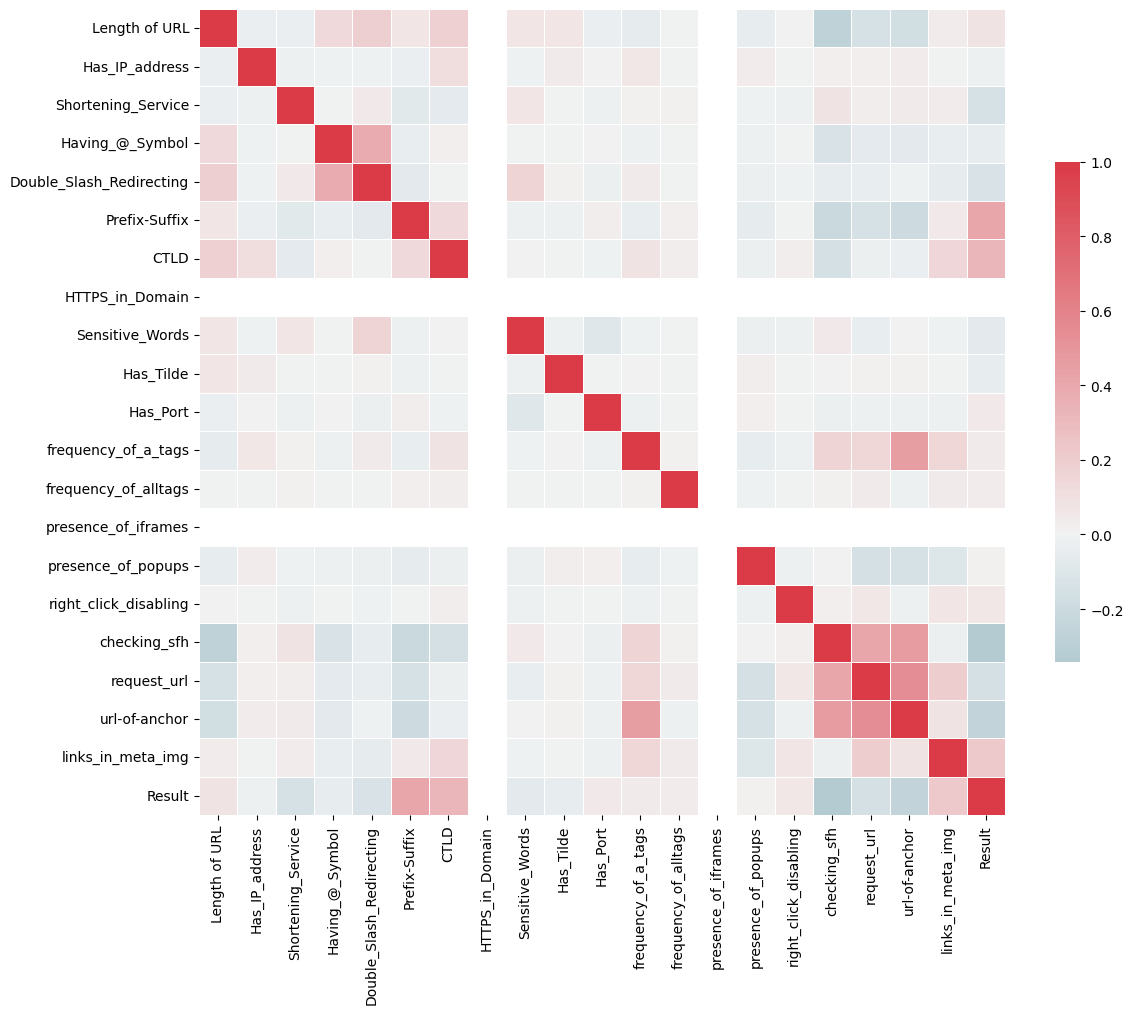

In [20]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})